<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.2: Continunity and Differentiation**\
This section goes through limits, continuity, derivatives and Taylor's Theorem

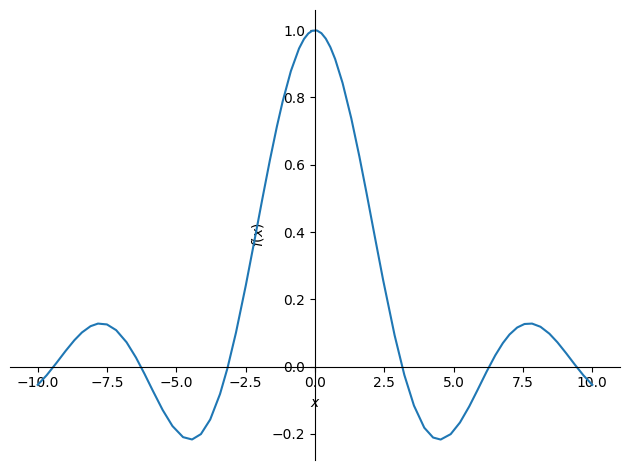

1


0.0470400026866224

In [14]:
#limts

#we can find limits using sympy
from sympy import *

x = symbols('x') #define x as a symbol
expr = sin(x)/x;

# using limit function from sympy
plot(expr)
print(limit(expr, x, 0))
limit(expr,x,3).evalf()

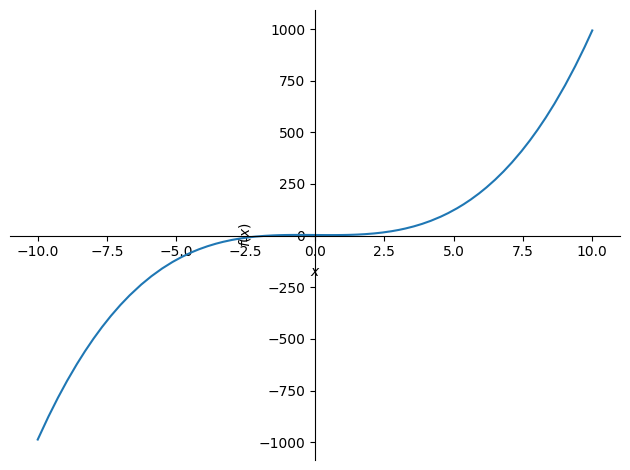

16.1250000000000


-333

In [20]:
#more limits
expr1 = x**3 - x +3;
plot(expr1)
print(limit(expr1,x,2.5))
limit(expr1,x,-7)

In [ ]:
#demonstrating continuity

**3.3: Unconstrained Optimization**\
This section goes through necessary and suﬀicent conditions of local minimizers, convexity and global minimizers and gradient descent